In [6]:
def accuracy_score(y_true, y_pred) -> int:
    """
    正答率計算用関数
    y_true：正解リスト
    y_pred：予測結果リスト
    accuracy：正答率
    """
    # 正解数
    correct_count=0
    for yt, yp in zip(y_true, y_pred):
        if yt==yp:
            correct_count += 1
    
    # 正答率を返す
    accuracy = correct_count / len(y_true)
    return accuracy

In [9]:
# 正答率の計算
l1 = [0,1,1,1,1,0,0,1]
l2 = [1,1,1,0,1,0,0,0]
accuracy_score(l1, l2)

0.625

In [15]:
# sklearnのmetricsを使えば確認可能
from sklearn import metrics
metrics.accuracy_score(l1, l2)

NameError: name 'l1' is not defined

In [2]:
def true_positive(y_true, y_pred) -> int:
    """
    真陽性を計算する関数
    y_true：正解リスト
    y_pred：予測結果リスト
    ture_positive：真陽性
    """
    # 真陽性の数
    true_positive_count=0
    
    for yt, yp in zip(y_true, y_pred):
        if yt==1 and yp==1:
            true_positive_count += 1
    return true_positive_count

def true_negative(y_true, y_pred) -> int:
    """
    真陰性を計算する関数
    y_true：正解リスト
    y_pred：予測結果リスト
    ture_positive：真陽性
    """
    # 真陽性の数
    true_negative_count=0
    
    for yt, yp in zip(y_true, y_pred):
        if yt==0 and yp==0:
            true_negative_count += 1
    return true_negative_count

def false_positive(y_true, y_pred) -> int:
    """
    偽陽性を計算する関数
    y_true：正解リスト
    y_pred：予測結果リスト
    false_positive：偽陽性
    """
    # 真陽性の数
    false_positive_count=0
    
    for yt, yp in zip(y_true, y_pred):
        if yt==0 and yp==1:
            false_positive_count += 1
    return false_positive_count

def false_negative(y_true, y_pred) -> int:
    """
    偽陰性を計算する関数
    y_true：正解リスト
    y_pred：予測結果リスト
    false_positive：偽陰性
    """
    # 真陽性の数
    false_negative_count=0
    
    for yt, yp in zip(y_true, y_pred):
        if yt==1 and yp==0:
            false_negative_count += 1
    return false_negative_count

In [2]:
# 正答率の計算
l1 = [0,1,1,1,1,0,0,1]
l2 = [1,1,1,0,1,0,0,0]
true_positive(l1, l2)
false_positive(l1, l2)
true_negative(l1, l2)
false_negative(l1, l2)

2

In [3]:
def accuracy_v2(y_true, y_pred) -> int:
    """
    正答率を算出
    """
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    accuracy_score = (tp + tn) / (tp + tn + fp + fn)
    return accuracy_score

In [4]:
def precision(y_true, y_pred):
    """
    適合性：真陽性/（真陽性＋偽陽性）
    """
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    precision = tp / (tp + fp)
    return precision

def recall(y_true, y_pred):
    """
    再現性：真陽性/（真陽性＋偽陰性）
    """
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    return tp / (tp + fn)

def f1(y_true, y_pred):
    """
    F1スコアの計算
    """
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f1 = 2 * p * r / (p + r)
    return f1

def tpr(y_true, y_pred):
    """
    true pos rateの計算
    """
    return recall(y_true, y_pred)

def fpr(y_true, y_pred):
    """
    false pos rateの計算
    """
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    fpr = fp / (tn + fp)
    return fpr

In [11]:
tpr_list = []
fpr_list = []

# answer
y_true = [0,1,1,1,1,0,1,1,0,1,0,1,1,0,1]

# precision
y_pred = [0.1,0.3,1,0.8,0.4,0.1,0.7,0,0.5,0,0,1,1,1,0]

# threshold
thresholds = [0,0.1,0.2,0.3,0,4,0.5,0.6,0.7,0.8,0.9,1.0]

# calc
for threshold in thresholds:
    tmp_pred = [1 if x >= threshold else 0 for x in y_pred]
    tmp_tpr = tpr(y_true, tmp_pred)
    tmp_fpr = fpr(y_true, tmp_pred)
    tpr_list.append(tmp_tpr)
    fpr_list.append(tmp_fpr)

In [13]:
fpr_list

[1.0, 0.8, 0.4, 0.4, 1.0, 0.0, 0.4, 0.2, 0.2, 0.2, 0.2, 0.2]

In [7]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

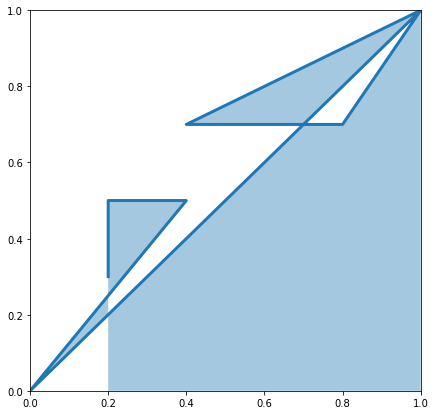

In [10]:
plt.figure(figsize=(7,7))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show

In [16]:
metrics.roc_auc_score(y_true, y_pred)

0.58

In [17]:
tp_list = []
fp_list = []

# answer
y_true = [0,1,1,1,1,0,1,1,0,1,0,1,1,0,1]

# precision
y_pred = [0.1,0.3,1,0.8,0.4,0.1,0.7,0,0.5,0,0,1,1,1,0]

# threshold
thresholds = [0,0.1,0.2,0.3,0,4,0.5,0.6,0.7,0.8,0.9,1.0]

# calc
for threshold in thresholds:
    tmp_pred = [1 if x >= threshold else 0 for x in y_pred]
    tmp_tp = true_positive(y_true, tmp_pred)
    tmp_fp = false_positive(y_true, tmp_pred)
    tp_list.append(tmp_tp)
    fp_list.append(tmp_fp)

In [20]:
fp_list

[5, 4, 2, 2, 5, 0, 2, 1, 1, 1, 1, 1]

<function matplotlib.pyplot.show(close=None, block=None)>

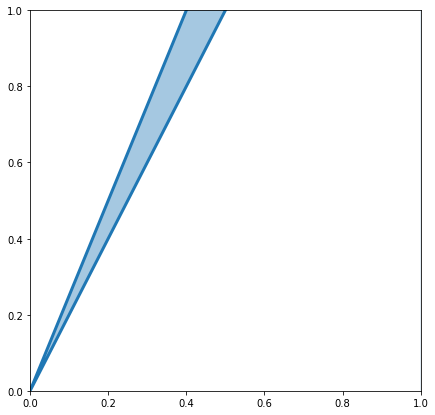

In [18]:
plt.figure(figsize=(7,7))
plt.fill_between(fp_list, tp_list, alpha=0.4)
plt.plot(fp_list, tp_list, lw=3)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show

In [21]:
import numpy as np

def log_loss(y_true, y_proba):
    """
    loglossを計算する関数
    y_true：正解のリスト
    y_proba：陽性の予測確率のリスト
    """
    # epsilonの定義
    epsilon = 1e-15
    
    # 個々のサンプルに対する損失関数のリスト
    loss = []
    
    # 各サンプルをループ
    for yt, yp in zip(y_true, y_proba):
        # 予測確率を調整するクリッピング処理
        yp = np.clip(yp, epsilon, 1- epsilon)
        
        # loglossの計算
        tmp_loss = (-1.0) * (
            yt * np.log(yp)
            + (1 - yt) * np.log(1 - yp)
        )
        loss.append(tmp_loss)
    
    # 平均値を返す
    return np.mean(loss)
        

In [22]:
# answer
y_true = [0,1,1,1,1,0,1,1,0,1,0,1,1,0,1]

# precision
y_proba = [0.1,0.3,1,0.8,0.4,0.1,0.7,0,0.5,0,0,1,1,1,0]

log_loss(y_true, y_proba)

9.450657028026772

In [25]:
metrics.log_loss(y_true, y_proba)

9.450657028026772

In [27]:
import numpy as np

def macro_precision(y_true, y_pred):
    # クラス数を取得
    num_classes = len(np.unique(y_true))
    
    # 初期化
    precision = 0
    
    # ループ
    for class_ in range(num_classes):
        tmp_true = [1 if p == class_ else 0 for p in y_true]
        tmp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        # 真陽性を計算
        tp = true_positive(tmp_true, tmp_pred)
        
        # 偽陽性を計算
        fp = false_positive(tmp_true, tmp_pred)
        
        # 適合率を計算
        tmp_precision = tp / (tp + fp)
        
        # 適合率を足し合わせる
        precision += tmp_precision
    
    # 平均の適合率を返す
    mean_precison = precision / len(num_classes)
    return precision

def micro_precision(y_true, y_pred):
    # クラス数を取得
    num_classes = len(np.unique(y_true))
    
    # 初期化
    precision = 0
    
    # ループ
    for class_ in range(num_classes):
        tmp_true = [1 if p == class_ else 0 for p in y_true]
        tmp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        # 真陽性を計算
        tmp_tp = true_positive(tmp_true, tmp_pred)
        
        # 偽陽性を計算
        tmp_fp = false_positive(tmp_true, tmp_pred)
        
        tp += tmp_tp
        fp += tmp_fp
        
    # 適合率を計算
    precision = tp / (tp + fp)
    return precision



from collections import Counter

def weighted_precision(y_true, y_pred):
    # クラス数を取得
    num_classes = len(np.unique(y_true))
    
    # クラスの重みを取得
    class_count = Counter(y_true)
    
    # 初期化
    precision = 0
    
    # ループ
    for class_ in range(num_classes):
        tmp_true = [1 if p == class_ else 0 for p in y_true]
        tmp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        # 真陽性を計算
        tp = true_positive(tmp_true, tmp_pred)
        
        # 偽陽性を計算
        fp = false_positive(tmp_true, tmp_pred)
        
        # 適合率を計算
        tmp_precision = tp / (tp + fp)
        
        # 重みつきの適合率を足し合わせる
        weighted_precision = class_count[class_] * tmp_precision
        precision += weighted_precision
    
    # 全サンプル数で割る
    overall_precision = precision / len(y_true)
    return overall_precision

In [28]:
# 他クラス分類の再現率
from collections import Counter

def weighted_f1(y_true, y_pred):
    # クラス数を取得
    num_classes = len(np.unique(y_true))
    
    # クラスの重みを取得
    class_count = Counter(y_true)
    
    # 初期化
    f1 = 0
    
    # ループ
    for class_ in range(num_classes):
        tmp_true = [1 if p == class_ else 0 for p in y_true]
        tmp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        # 真陽性を計算
        p = precision(tmp_true, tmp_pred)
        
        # 偽陽性を計算
        r = recall(tmp_true, tmp_pred)
        
        # f1スコアを計算
        if p + r != 0:
            tmp_f1 = 2 * p * r / (p + r)
        else:
            tmp_f1 = 0
        
        # 重みつきの適合率を足し合わせる
        weighted_f1 = class_count[class_] * tmp_f1
        f1 += weighted_f1
    
    # 全サンプル数で割る
    overall_f1 = f1 / len(y_true)
    return overall_f1

In [30]:
!pip install seaborn

     |████████████████████████████████| 292 kB 1.7 MB/s eta 0:00:01     |███████████████████             | 174 kB 1.7 MB/s eta 0:00:01


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# answer
y_true = [0,0,2,1,1,1,2,1,0,1,1,1,1,2,1]

# precision
y_pred = [0,2,2,1,0,1,1,1,1,2,0,1,0,2,1]

cm = metrics.confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,10))
cmap = sns.cubehelix_pallete(50, annot=True, cmap=cmap, cbar=False)


AttributeError: module 'seaborn' has no attribute 'cubehelix_pallete'

<Figure size 720x720 with 0 Axes>

In [33]:
def pk(y_true, y_pred, k):
    """
    precision at kを算出
    予測値の上位kクラスのうち、正解となるクラスの割合
    """
    
    if k==0:
        return 0
    
    # 予測クラスの上位k個
    y_pred = y_pred[:k]
    
    # 予測クラスをsetに変換して重複を排除
    pred_set = set(y_pred)
    
    # 正解クラスをsetに変換して重複を排除
    true_set = set(y_true)
    
    # 共通しているクラスを積集合として取得
    common_values = pred_set.intersection(true_set)
    
    # 共通しているクラス数をkで割った値を返す
    return len(common_values) / len(y_pred[:k])

In [46]:
def apk(y_true, y_pred, k):
    """
    precision at kを算出
    予測値の上位kクラスのうち、正解となるクラスの割合
    """
    # リストの初期化
    pk_values = []
    
    # ループ
    for i in range(1, k+1):
        pk_values.append(pk(y_true, y_pred, i))
    # リストが空の場合0を返す
    if len(pk_values) == 0:
        return 0
                         
    return sum(pk_values) / len(pk_values)